In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
df = pd.read_csv(r'C:\Users\pranay kumar\Downloads\diamonds.csv')
df.head()



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [30]:

# 1. Understanding the Data
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())
print("\nSummary statistics:")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None

First few rows:
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334 

In [31]:

# 2. Problem Statement
# Primary Question: Can we predict the price of a diamond based on its physical attributes (carat, cut, color, clarity, depth, table, x, y, z)?
# This is a regression problem as price is a continuous variable.

# 3. Data Cleaning and Manipulation
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Checking for invalid values (e.g., negative or zero dimensions)
print("\nInvalid dimensions (x, y, z <= 0):")
print(df[(df['x'] <= 0) | (df['y'] <= 0) | (df['z'] <= 0)].shape[0])

# Dropping invalid entries
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]

# 4. Identifying Data Types
# Discrete/Categorical: cut, color, clarity (ordinal)
# Continuous: carat, depth, table, price, x, y, z
print("\nData Types:")
print(df.dtypes)



Missing Values:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Invalid dimensions (x, y, z <= 0):
20

Data Types:
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


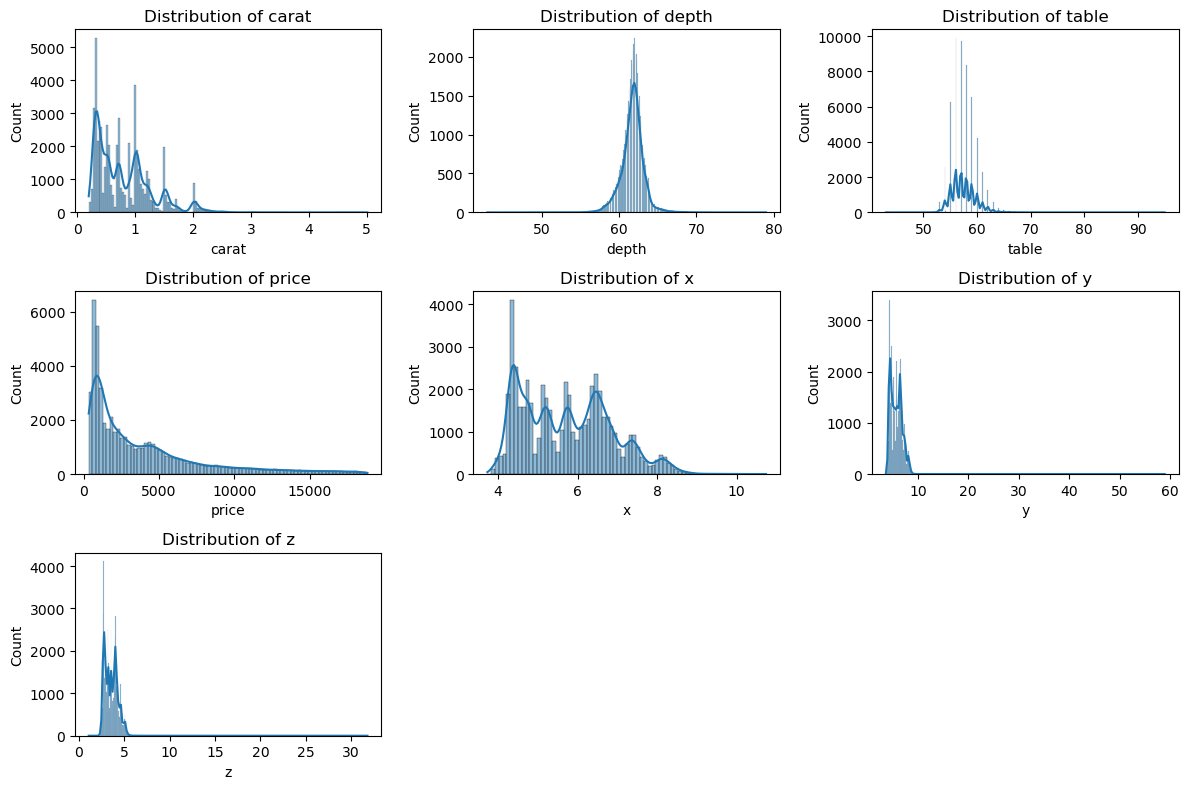

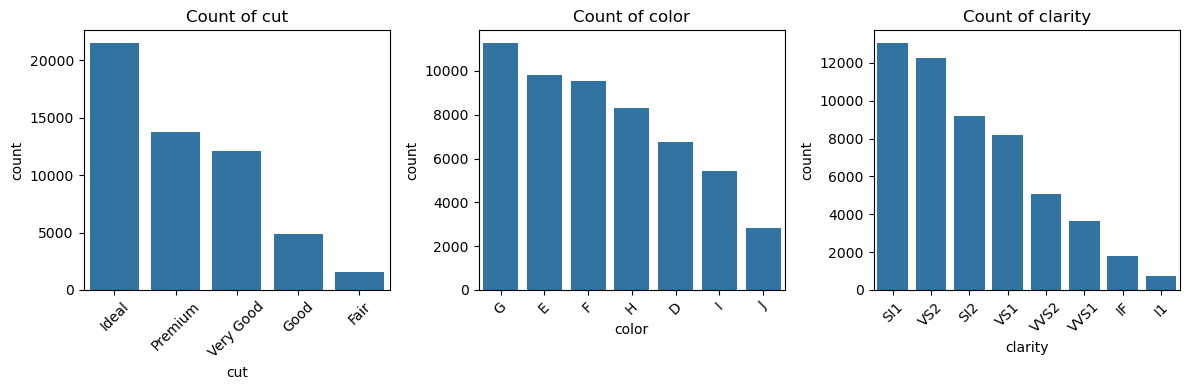

In [32]:
# 5. Formulating Analysis Questions
# - How does carat weight affect price?
# - Do cut, color, and clarity have significant impacts on price?
# - Are there strong correlations between physical dimensions (x, y, z) and price?
# - How do the categorical variables interact with each other?

# 6. Visualization
# Distribution of numerical variables
plt.figure(figsize=(12, 8))
numerical_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Distribution of categorical variables
plt.figure(figsize=(12, 4))
categorical_cols = ['cut', 'color', 'clarity']
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

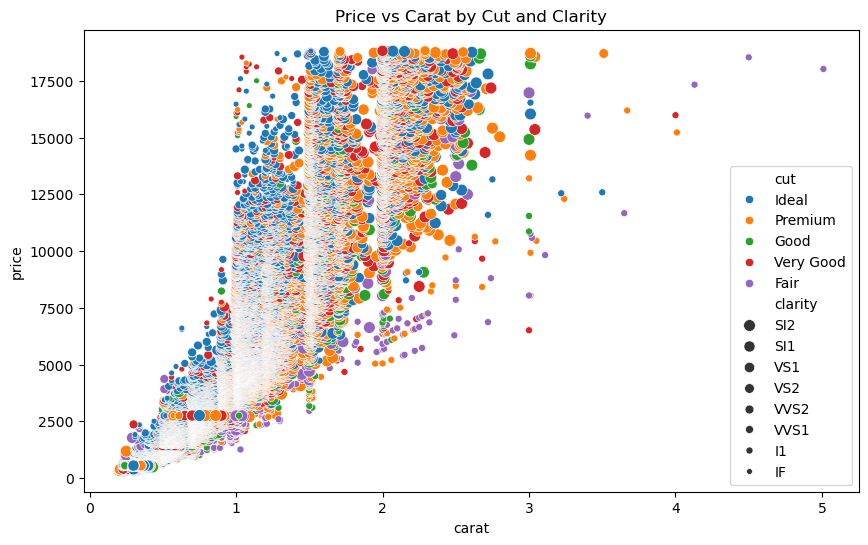

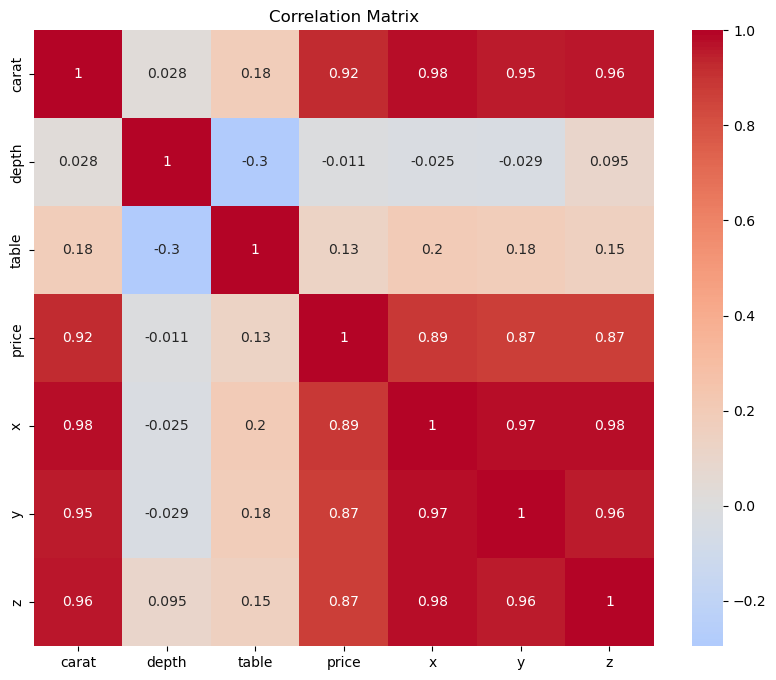

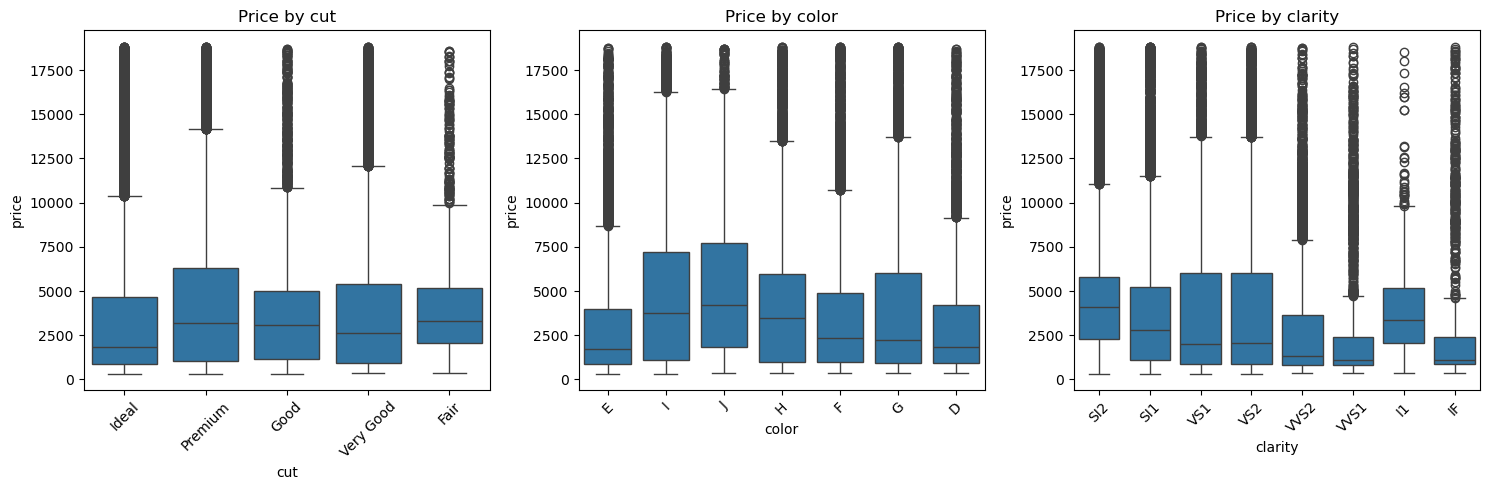

In [33]:

# Price vs Carat
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='price', hue='cut', size='clarity')
plt.title('Price vs Carat by Cut and Clarity')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
numerical_df = df[numerical_cols]
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Box plots for categorical variables vs price
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x=col, y='price')
    plt.title(f'Price by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
# Sprint 1: Preprocessing

# Defining ordinal categories for categorical variables
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# Initializing OrdinalEncoder
ordinal_Encoder = OrdinalEncoder(categories=[cut_order, color_order, clarity_order])

# Encoding categorical variables
df[['cut', 'color', 'clarity']] = ordinal_encoder.fit_transform(df[['cut', 'color', 'clarity']])

# Defining features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing StandardScaler
scaler = StandardScaler()

# Scaling numerical features
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

NameError: name 'OrdinalEncoder' is not defined

In [36]:
# Sprint 2: Model Development

# Training and evaluating models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    # Training
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Evaluation
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    results[name] = {
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R2': train_r2,
        'Test R2': test_r2
    }


NameError: name 'X_train' is not defined

In [37]:
# Displaying results
print("\nModel Performance:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Feature importance for Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance (Random Forest)')
plt.show()


Model Performance:


NameError: name 'X' is not defined

In [38]:

# Sprint 3: Model Deployment
# For deployment, we would typically save the model and deploy it using a framework like Flask or FastAPI.
# For this notebook, we'll demonstrate saving the model.
import joblib
joblib.dump(models['Random Forest'], 'random_forest_diamond_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'encoder.pkl')


NameError: name 'scaler' is not defined